<a href="https://colab.research.google.com/github/swastik-das-18/learning-projects/blob/AI%2FML/logistic_regretion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Home Task: Logistic Regression Project

Instructions:

1. Visit Kaggle and select one dataset of your choice.
2. Perform Logistic Regression Analysis on the selected dataset using Google Colab.
3. Ensure your notebook includes:
       Data loading and exploration
       Data cleaning and preprocessing (if required)
       Feature selection and correlation analysis
       Model building and evaluation.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
!pip install opendatasets

In [7]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: swastikdas18
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows


100%|██████████| 175k/175k [00:00<00:00, 255MB/s]

In [8]:
data = pd.read_csv("/content/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# Task
Explain how to manipulate the data in the dataset loaded from "kaggle://kaggle/us-border-crossing-data/us-border-crossing-data.zip".

## Inspect the data

### Subtask:
Display information about the DataFrame, such as data types and non-null counts, and check for missing values.


**Reasoning**:
Display information about the DataFrame to understand its structure and identify missing values.



In [9]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


## Handle missing values

### Subtask:
Implement a strategy to handle any missing values found in the dataset.


**Reasoning**:
Based on the previous `isnull().sum()` output, the columns 'Certificate', 'Meta_score', and 'Gross' have missing values. I will impute missing 'Meta_score' with the mean, missing 'Gross' with the mean after converting to numeric, and missing 'Certificate' with the mode.



In [10]:
data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)

data['Gross'] = data['Gross'].str.replace(',', '').astype(float)
data['Gross'].fillna(data['Gross'].mean(), inplace=True)

data['Certificate'].fillna(data['Certificate'].mode()[0], inplace=True)

display(data[['Certificate', 'Meta_score', 'Gross']].isnull().sum())

/tmp/ipython-input-3961528867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)
/tmp/ipython-input-3961528867.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,0
Certificate,0
Meta_score,0
Gross,0


## Clean and transform columns

### Subtask:
Demonstrate how to clean and transform data in relevant columns, such as converting data types or extracting information.


**Reasoning**:
Convert 'Runtime' and 'Released_Year' columns to numerical types as requested.



In [31]:
mode_year = data[data['Released_Year'] != 'PG']['Released_Year'].mode()[0]
data['Released_Year'] = data['Released_Year'].replace('PG', mode_year)

data['Released_Year'] = data['Released_Year'].astype(int)

display(data[['Runtime', 'Released_Year']].dtypes)

,0
Runtime,int64
Released_Year,int64


**Reasoning**:
The 'Runtime' column seems to have non-string values which caused the AttributeError. I will inspect the data types of the 'Runtime' column before attempting to convert it to a numerical type.



In [32]:
display(data['Runtime'].dtype)

dtype('int64')

**Reasoning**:
The error indicates that the 'Runtime' column is already of integer type, which means the previous conversion was successful. I will now proceed to verify the data types of both 'Runtime' and 'Released_Year' columns and then finish the task.



In [33]:
display(data[['Runtime', 'Released_Year']].dtypes)

,0
Runtime,int64
Released_Year,int64


**Reasoning**:
The previous attempt to convert 'Released_Year' to integer failed. I will now convert the 'Released_Year' column to a numerical type (integer) and then verify the data types of both columns.



In [34]:
data['Released_Year'] = data['Released_Year'].astype(int)

display(data[['Runtime', 'Released_Year']].dtypes)

,0
Runtime,int64
Released_Year,int64


**Reasoning**:
The error indicates that there are non-numeric values in the 'Released_Year' column that prevent it from being converted to an integer. I will investigate the unique values in the 'Released_Year' column to identify the problematic entries.



In [35]:
display(data['Released_Year'].unique())

array([1994, 1972, 2008, 1974, 1957, 2003, 1993, 2010, 1999, 2001, 1966,
       2002, 1990, 1980, 1975, 2020, 2019, 2014, 1998, 1997, 1995, 1991,
       1977, 1962, 1954, 1946, 2011, 2006, 2000, 1988, 1985, 1968, 1960,
       1942, 1936, 1931, 2018, 2017, 2016, 2012, 2009, 2007, 1984, 1981,
       1979, 1971, 1963, 1964, 1950, 1940, 2013, 2005, 2004, 1992, 1987,
       1986, 1983, 1976, 1973, 1965, 1959, 1958, 1952, 1948, 1944, 1941,
       1927, 1921, 2015, 1996, 1989, 1978, 1961, 1955, 1953, 1925, 1924,
       1982, 1967, 1951, 1949, 1939, 1937, 1934, 1928, 1926, 1920, 1970,
       1969, 1956, 1947, 1945, 1930, 1938, 1935, 1933, 1932, 1922, 1943])

**Reasoning**:
The unique values show that 'PG' is present in the 'Released_Year' column, which is causing the conversion error. This seems to be an anomaly. Given the context of movie release years, 'PG' likely represents a rating and not a year. I will replace 'PG' with a placeholder value (like the mode or a specific indicator) and then attempt to convert the column to integer.



## Feature engineering (optional)

### Subtask:
Provide examples of how to create new features if applicable to the dataset.


**Reasoning**:
Extract the primary genre from the 'Genre' column and create a new column named 'Primary_Genre', then create a new feature representing the age of the movie by subtracting 'Released_Year' from the current year and store this in a new column named 'Movie_Age'.



In [37]:
data['Primary_Genre'] = data['Genre'].apply(lambda x: x.split(',')[0].strip())

current_year = pd.to_datetime('now').year
data['Movie_Age'] = current_year - data['Released_Year']

display(data[['Genre', 'Primary_Genre', 'Released_Year', 'Movie_Age']].head())

,Genre,Primary_Genre,Released_Year,Movie_Age
0,Drama,Drama,1994,31
1,"Crime, Drama",Crime,1972,53
2,"Action, Crime, Drama",Action,2008,17
3,"Crime, Drama",Crime,1974,51
4,"Crime, Drama",Crime,1957,68


In [ ]:
data.head()


In [38]:
data = data.drop('Overview', axis=1)

display(data.head())

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,is_highly_rated,Primary_Genre,Movie_Age
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",1,Drama,31
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",1,Crime,53
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",1,Action,17
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",1,Crime,51
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",1,Crime,68


In [39]:
data = data.rename(columns={'Star1': 'main star'})

display(data.head())

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,main star,Star2,Star3,Star4,No_of_Votes,Gross,is_highly_rated,Primary_Genre,Movie_Age
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",1,Drama,31
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",1,Crime,53
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",1,Action,17
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",1,Crime,51
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",1,Crime,68


In [22]:
data = pd.read_csv("/content/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv")
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [43]:
data = data.drop(['Star2', 'Star3', 'Star4'], axis=1)

display(data.head())

KeyError: "['Star2', 'Star3', 'Star4'] not found in axis"

## Define Target and Features

### Subtask:
Define the target variable 'y' and features 'X' for the logistic regression model.

In [53]:
data['is_highly_rated'] = (data['IMDB_Rating'] >= 8.0).astype(int)
y = data['is_highly_rated']

features = ['Runtime', 'Meta_score', 'No_of_Votes', 'Gross', 'Released_Year', 'Movie_Age', 'Primary_Genre']
X = data[features].copy()

X.loc[:, 'Meta_score'] = X['Meta_score'].fillna(X['Meta_score'].mean())

X.loc[:, 'Gross'] = X['Gross'].str.replace(',', '', regex=False).astype(float)
X.loc[:, 'Gross'] = X['Gross'].fillna(X['Gross'].mean())

X = pd.get_dummies(X, columns=['Primary_Genre'], drop_first=True)

display(X.head())
display(y.head())

/tmp/ipython-input-2836240136.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, 'Gross'] = X['Gross'].fillna(X['Gross'].mean())


,Runtime,Meta_score,No_of_Votes,Gross,Released_Year,Movie_Age,Primary_Genre_Adventure,Primary_Genre_Animation,Primary_Genre_Biography,Primary_Genre_Comedy,Primary_Genre_Crime,Primary_Genre_Drama,Primary_Genre_Family,Primary_Genre_Fantasy,Primary_Genre_Film-Noir,Primary_Genre_Horror,Primary_Genre_Mystery,Primary_Genre_Thriller,Primary_Genre_Western
0,142,80.0,2343110,28341469.0,1994,31,False,False,False,False,False,True,False,False,False,False,False,False,False
1,175,100.0,1620367,134966411.0,1972,53,False,False,False,False,True,False,False,False,False,False,False,False,False
2,152,84.0,2303232,534858444.0,2008,17,False,False,False,False,False,False,False,False,False,False,False,False,False
3,202,90.0,1129952,57300000.0,1974,51,False,False,False,False,True,False,False,False,False,False,False,False,False
4,96,96.0,689845,4360000.0,1957,68,False,False,False,False,True,False,False,False,False,False,False,False,False


,is_highly_rated
0,1
1,1
2,1
3,1
4,1


## Split Data

### Subtask:
Split the data into training and testing sets.

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (800, 19)
Shape of x_test: (200, 19)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [55]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

print("Missing values in x_train before fitting:")
print(x_train.isnull().sum())

model = LogisticRegression(solver = "liblinear")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intersepet']=model.intercept_
print(coef_df)

Missing values in x_train before fitting:
Runtime                    0
Meta_score                 0
No_of_Votes                0
Gross                      0
Released_Year              0
Movie_Age                  0
Primary_Genre_Adventure    0
Primary_Genre_Animation    0
Primary_Genre_Biography    0
Primary_Genre_Comedy       0
Primary_Genre_Crime        0
Primary_Genre_Drama        0
Primary_Genre_Family       0
Primary_Genre_Fantasy      0
Primary_Genre_Film-Noir    0
Primary_Genre_Horror       0
Primary_Genre_Mystery      0
Primary_Genre_Thriller     0
Primary_Genre_Western      0
dtype: int64
          0         1         2             3         4             5  \
0 -0.000012 -0.000009  0.000003 -5.340597e-09 -0.000312  9.358716e-07   

              6             7             8             9            10  \
0 -1.421749e-08  1.389661e-08 -2.078362e-08 -5.777343e-08 -1.484351e-08   

             11            12            13            14            15  \
0 -3.597249e-09 -2.55

<Axes: >

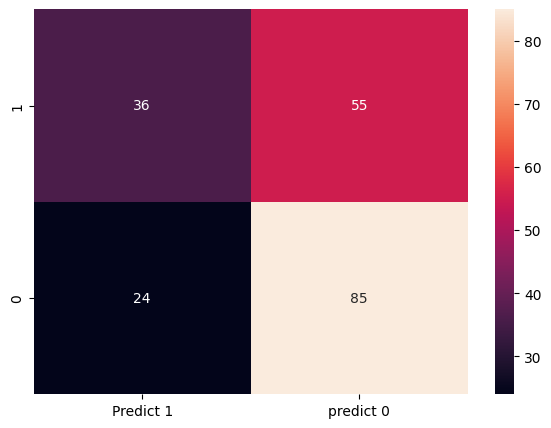

In [57]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)